In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")
from utils.functions import *
from build import morse_complex as mc

In [2]:
data = "../data/mnist_labels"
files = os.listdir(data)

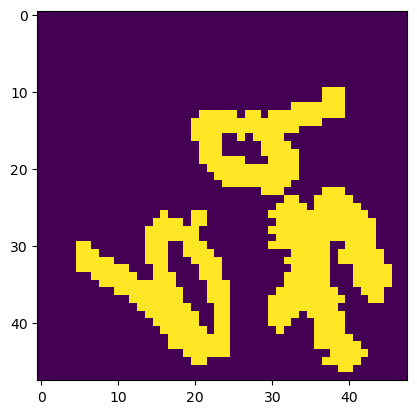

In [3]:
#img = np.load(data+"/"+files[10])
img = np.load(data+"/"+files[45])
img3D = np.array([1-img])
plt.imshow(img)

## Skeleton without distance transform

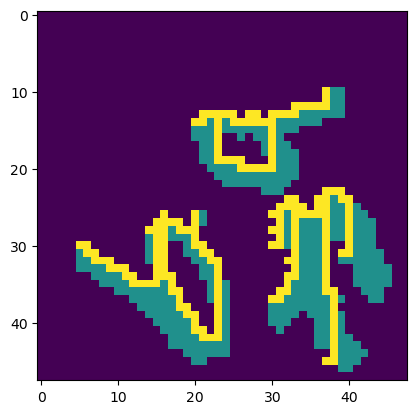

In [4]:
MC = mc.MorseComplex(img3D)
MC.process_lower_stars() 

MC.extract_morse_skeleton_below(1)
voxels = MC.get_lower_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0], voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+img)

## Skeleton with distance transform

[[44, 57, 14, 0], [44, 43, 0, 0], [0, 14, 14, 0]]


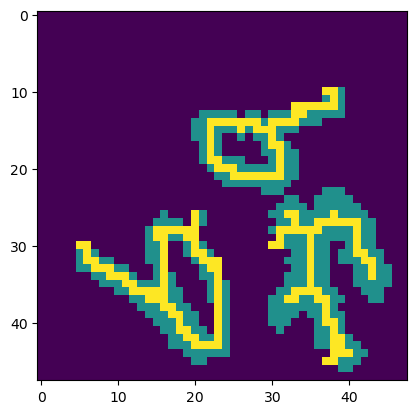

In [5]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.extract_morse_skeleton_below(0)
voxels = MC.get_lower_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

## Skeleton when cancelling all pairs

[[3, 16, 14, 0], [3, 2, 0, 0], [0, 14, 14, 0]]


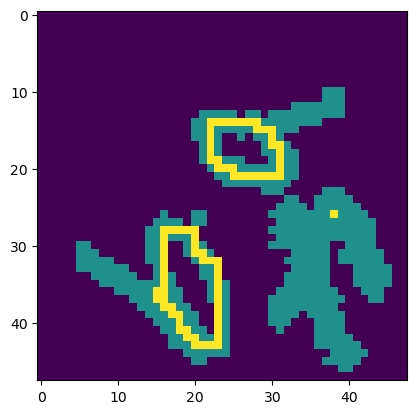

In [6]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_all_pairs_below(0)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_lower_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

## Skeleton when canceling low persistence pairs 

[[23, 36, 14, 0], [23, 22, 0, 0], [0, 14, 14, 0]]


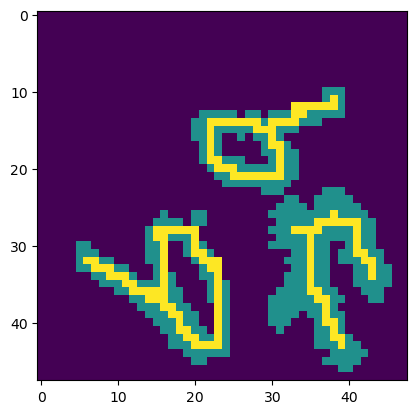

In [7]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_low_persistence_pairs_below(0,0.5)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_lower_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

## Skeleton when cancelling boundary pairs

[[6, 19, 14, 0], [6, 5, 0, 0], [0, 14, 14, 0]]


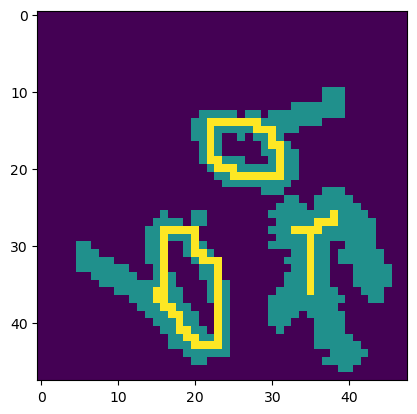

In [8]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_boundary_pairs_below(0,3)
MC.extract_morse_skeleton_below(0)
voxels = MC.get_lower_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+img)
print(MC.get_number_of_critical_cells(0))

## Background skeleton with distance transform

[[44, 57, 14, 0], [44, 43, 0, 0], [0, 14, 14, 0]]


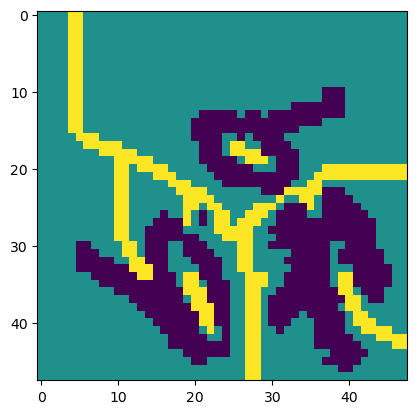

In [9]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.extract_morse_skeleton_batchwise_above(0)
voxels = MC.get_upper_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+(1-img))
print(MC.get_number_of_critical_cells(0))

## Background skeleton when cancelling all pairs

[[44, 50, 7, 0], [44, 43, 0, 0], [0, 7, 7, 0]]


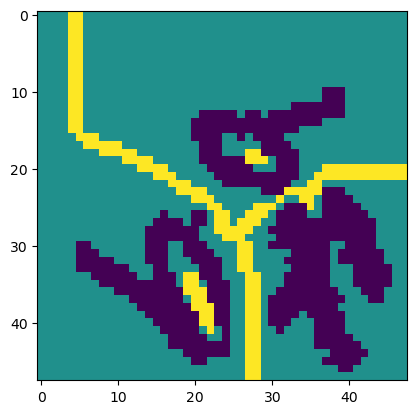

In [10]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_all_pairs_above(0)
MC.extract_morse_skeleton_above(0)
voxels = MC.get_upper_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+(1-img))
print(MC.get_number_of_critical_cells(0))

## Background skeleton when cancelling low persistence pairs

[[44, 52, 9, 0], [44, 43, 0, 0], [0, 9, 9, 0]]


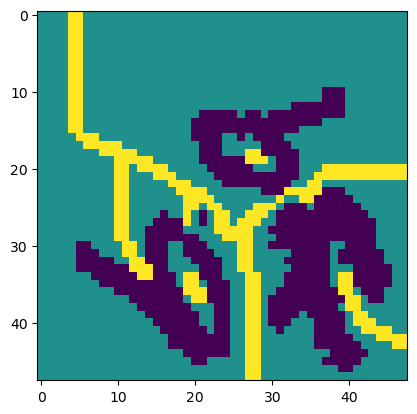

In [11]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_low_persistence_pairs_above(0,0.5)
MC.extract_morse_skeleton_above(0)
voxels = MC.get_upper_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+(1-img))
print(MC.get_number_of_critical_cells(0))

## Background skeleton when cancelling boundary pairs

[[44, 51, 8, 0], [44, 43, 0, 0], [0, 8, 8, 0]]


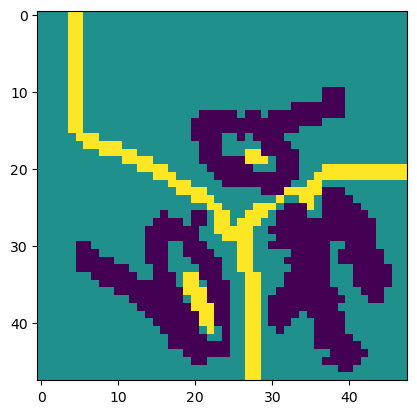

In [12]:
d = distance_transform(img3D)
MC = mc.MorseComplex(d)
MC.process_lower_stars()

MC.sort_critical_cells()
MC.cancel_boundary_pairs_above(0,4)
MC.extract_morse_skeleton_above(0)
voxels = MC.get_upper_morse_skeleton()
skel = np.zeros_like(img3D)
skel[voxels[:,0],voxels[:,1],voxels[:,2]] = 1
skel = skel[0,:,:]

plt.imshow(skel+(1-img))
print(MC.get_number_of_critical_cells(0))

## Pipeline to extract skeletons

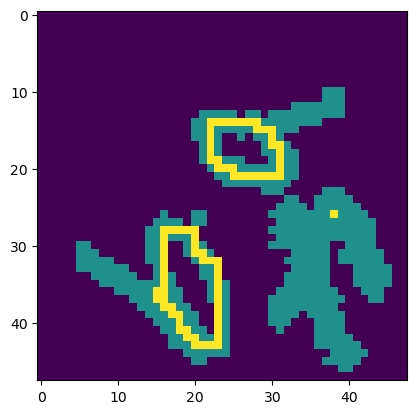

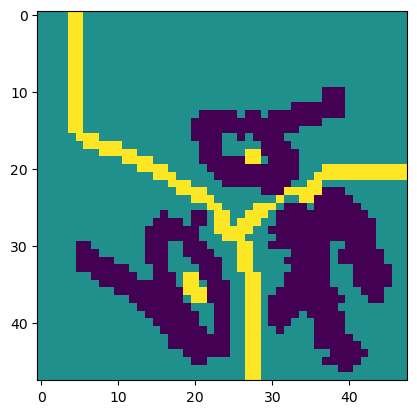

[[3, 5, 3, 0], [3, 2, 0, 0], [0, 3, 3, 0]]


In [12]:
# load image
img = np.load(data+"/"+files[45])

# make it 3D if necessary and the foreground to label 0
img3D = np.array([1-img])

# compute distance transform
d = distance_transform(img3D)

# initialize MC class
MC = mc.MorseComplex(d)

# process lower stars up to threshold with paralleization (performance might be depending on your system)
# don't choose threshold if you want to compute background skeleton as well, otherwise chose threshold of foreground (0 for distance transform images)
MC.process_lower_stars(threshold=np.inf, x_patch=2, y_patch=2, z_patch=2) 

# if you want to cancel pairs, sort the critical cells first
MC.sort_critical_cells()

# do the corresponding cancelling with correct parameters (if wanted)
# this cancels all pairs in foreground
MC.cancel_all_pairs_below(threshold=0)
# this cancels low persistence pairs in foreground
MC.cancel_low_persistence_pairs_below(threshold=0, epsilon=0.5)
# this cancels boundary pairs in foreground
MC.cancel_boundary_pairs_below(threshold=0, delta=3)
# this cancels all pairs in background
MC.cancel_all_pairs_above(threshold=0)
# this cancels low persistence pairs in foreground
MC.cancel_low_persistence_pairs_above(threshold=0, epsilon=0.5)
# this cancels boundary pairs in foreground
MC.cancel_boundary_pairs_above(threshold=0, delta=3)


# if you want the foreground skeleton, use one of the following functions (performance might be depending on your system)
MC.extract_morse_skeleton_below(threshold=0)
MC.extract_morse_skeleton_parallel_below(threshold=0)
MC.extract_morse_skeleton_batchwise_below(threshold=0, batches=128)

# if you want the background skeleton, use one of the following functions (performance might be depending on your system)
MC.extract_morse_skeleton_above(threshold=0)
MC.extract_morse_skeleton_parallel_above(threshold=0)
MC.extract_morse_skeleton_batchwise_above(threshold=0, batches=128)

# get the extracted lower skeleton and create a skeleton image
skeleton_voxels = MC.get_lower_morse_skeleton()
skeleton_foreground = np.zeros_like(img3D)
skeleton_foreground[skeleton_voxels[:,0],skeleton_voxels[:,1],skeleton_voxels[:,2]] = 1

# get the extracted upper skeleton (if wanted) and create a skeleton image
skeleton_voxels = MC.get_upper_morse_skeleton()
skeleton_background = np.zeros_like(img3D)
skeleton_background[skeleton_voxels[:,0],skeleton_voxels[:,1],skeleton_voxels[:,2]] = 1

# if the image was 2D originally, get the correct shape
skeleton_foreground = skeleton_foreground[0,:,:]
skeleton_background = skeleton_background[0,:,:]

# plot the skeleton in the image and print the number of critical cells for tuning the parameters
plt.imshow(skeleton_foreground+img)
plt.show()
plt.imshow(skeleton_background+(1-img))
plt.show()
print(MC.get_number_of_critical_cells(0))